<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Jamboree-case-study/blob/main/Jamboree_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JAMBOREE EDUCATION BIZ CASE STUDY

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.



### PROBLEM STATEMENT:

To analyse the Jamboree dataset which will help

1. In understanding what factors are important in graduate admissions
2. How these factors are interrelated among themselves
3. Also help predict one's chances of admission given the rest of the variables.



### Concept Used:

1. Exploratory Data Analysis

2. Linear Regression


To get insights and make better business decision, we need functions and methods, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2024-02-12 06:15:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2024-02-12 06:15:20 (174 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')


### TO GET BASIC UNDERSTANDING OF THE DATASET

In [ ]:
df.head(2)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [ ]:
df.tail(2)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
df.sample(2)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
5,6,330,115,5,4.5,3.0,9.34,1,0.90
153,154,324,105,3,3.0,4.0,8.75,0,0.79


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

df.shape

(500, 9)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

df.size

4500

In [ ]:
# To get index

df.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
# TO GET THE NAMES OF THE COLUMNS

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# TO GET THE NAMES OF THE COLUMNS(alternate method)

df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### MEMORY SPACE UTILIZATION

In [ ]:
# To get memory usage of each column

df.memory_usage()

Index                 128
Serial No.           4000
GRE Score            4000
TOEFL Score          4000
University Rating    4000
SOP                  4000
LOR                  4000
CGPA                 4000
Research             4000
Chance of Admit      4000
dtype: int64

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


All the columns have small values only so intead of int64 & float64 we can use int32 & float32 which will eventually reduce the memory usage

In [ ]:
int_col = ['Serial No.','GRE Score','TOEFL Score','University Rating','Research']

for i in int_col:
  df[i] = df[i].astype('int32')

In [ ]:
float_col = ['SOP','LOR ','CGPA','Chance of Admit ']

for i in float_col:
  df[i] = df[i].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int32  
 1   GRE Score          500 non-null    int32  
 2   TOEFL Score        500 non-null    int32  
 3   University Rating  500 non-null    int32  
 4   SOP                500 non-null    float32
 5   LOR                500 non-null    float32
 6   CGPA               500 non-null    float32
 7   Research           500 non-null    int32  
 8   Chance of Admit    500 non-null    float32
dtypes: float32(4), int32(5)
memory usage: 17.7 KB


### INFERENCE:

The Memory Usage has been reduced from 35.3KB to **17.7KB**

### CONVERSION OF CATEGORICAL ATTRIBUTE TO 'CATEGORY'

In [ ]:
cat_col = ['University Rating','SOP','LOR ','Research']

for i in cat_col:
  df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Serial No.         500 non-null    int32   
 1   GRE Score          500 non-null    int32   
 2   TOEFL Score        500 non-null    int32   
 3   University Rating  500 non-null    category
 4   SOP                500 non-null    category
 5   LOR                500 non-null    category
 6   CGPA               500 non-null    float32 
 7   Research           500 non-null    category
 8   Chance of Admit    500 non-null    float32 
dtypes: category(4), float32(2), int32(3)
memory usage: 12.9 KB


### INFERENCE:

The memory usage is further reduced to **12.9KB**

### DROPPING UNIQUE ROW IDENTIFIER

In [ ]:
df.drop('Serial No.',axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int32   
 1   TOEFL Score        500 non-null    int32   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float32 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float32 
dtypes: category(4), float32(2), int32(2)
memory usage: 10.9 KB


### INFERENCE:

Finally the memory usage has been reduced to **10.9KB**

### MISSING VALUE DETECTION


In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### INFERENCE:
There are **No Null Values** in the dataset

## Check for duplicates

In [ ]:
duplicate_rows = len(df[df.duplicated()])
duplicate_rows


0

### INFERENCE:

There are **No Duplicates** in the dataset

### STATISTICAL SUMMERY


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### INFERENCE:

The mean **chance of Admission**  is **72%**

## VISUAL ANALYSIS

## UNIVARIATE

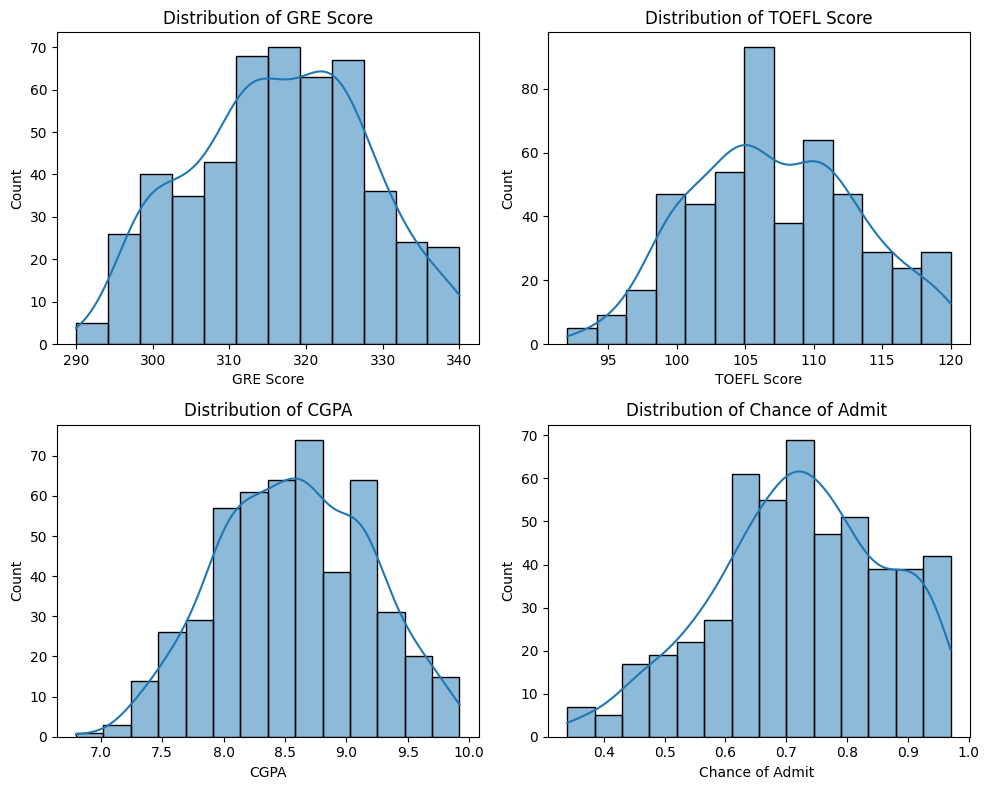

In [ ]:
# taking all the numerical columns names in an array
num_col = ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']

# subplotting the graphs
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# creating Histplot for every numerical attributes
index = 0
for rows in range(2):
  for cols in range(2):
    sns.histplot(df[num_col[index]],ax=axis[rows,cols],kde='True')

    axis[rows,cols].set_title(f'Distribution of {num_col[index]}')
    index+=1

plt.tight_layout()
plt.show()

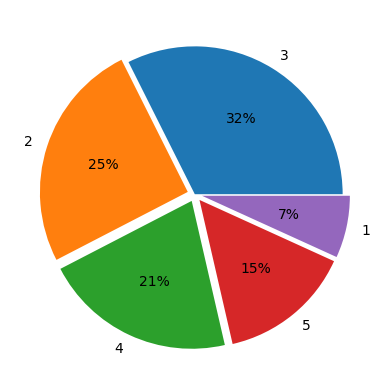

In [ ]:
University_Rating = df['University Rating'].value_counts()

plt.pie(University_Rating,labels=University_Rating.index,explode=[0,0.05,0.05,0.05,0.05],autopct='%.0f%%')
plt.show()

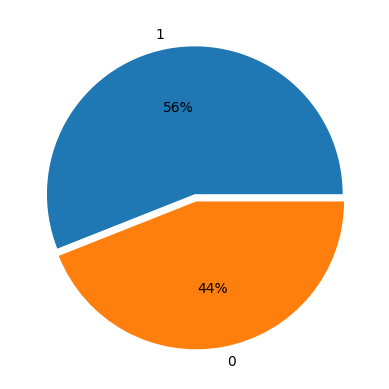

In [ ]:
Research = df['Research'].value_counts()

plt.pie(Research,labels=Research.index,explode=[0,0.05],autopct='%.0f%%')
plt.show()

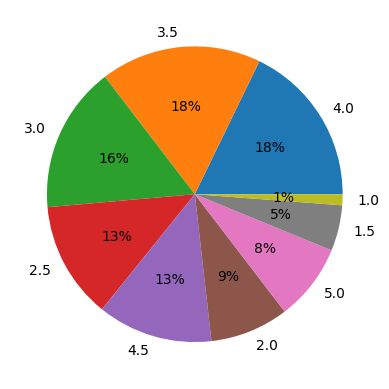

In [ ]:
SOP = df['SOP'].value_counts()

plt.pie(SOP,labels=SOP.index,autopct='%.0f%%')
plt.show()

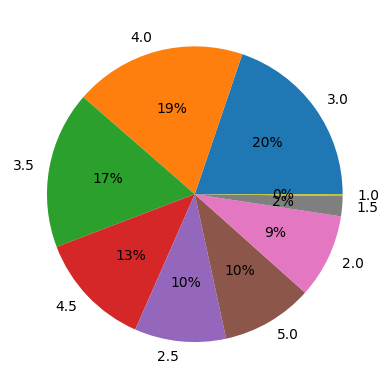

In [ ]:
LOR  = df['LOR '].value_counts()

plt.pie(LOR ,labels=LOR .index,autopct='%.0f%%')
plt.show()

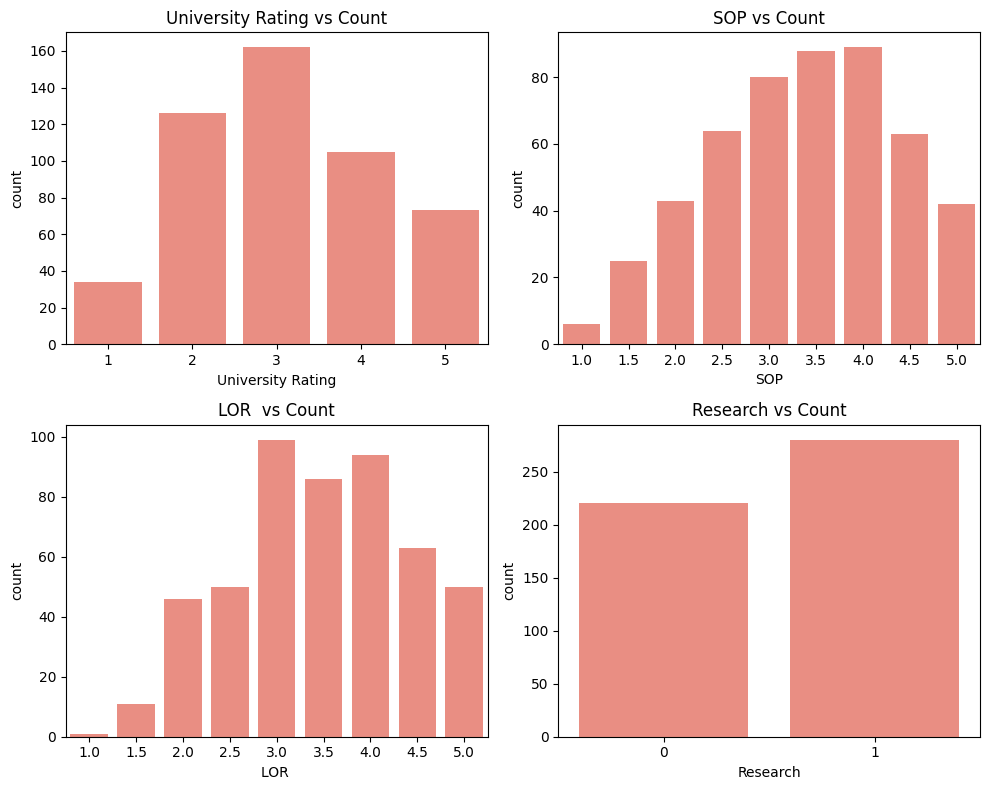

In [ ]:
cat_col = ['University Rating','SOP','LOR ','Research']

# subplotting the graphs
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# creating Countplot for every numerical attributes
index = 0
for rows in range(2):
  for cols in range(2):
    sns.countplot(data = df,x=cat_col[index],ax=axis[rows,cols],color = 'Salmon')
    axis[rows,cols].set_title(f'{cat_col[index]} vs Count')
    index+=1

plt.tight_layout()
plt.show()

### INFERENCE:

1. Most of the university fall under rating 3

2. The difference in count of graduates who did reseearch and those who didnt is not very big.



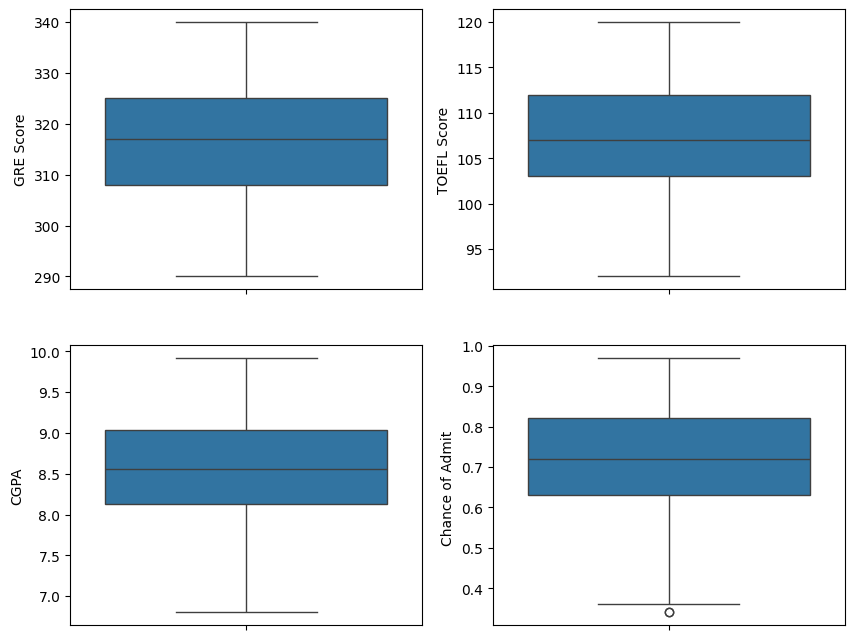

In [ ]:
num_col = ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']


fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

index = 0
for rows in range(2):
  for cols in range(2):
    sns.boxplot(df[num_col[index]],ax=axis[rows,cols])

    index+=1


plt.show()

### INFERENCE:

There are **no outliers** in the dataset

### BIVARIATE

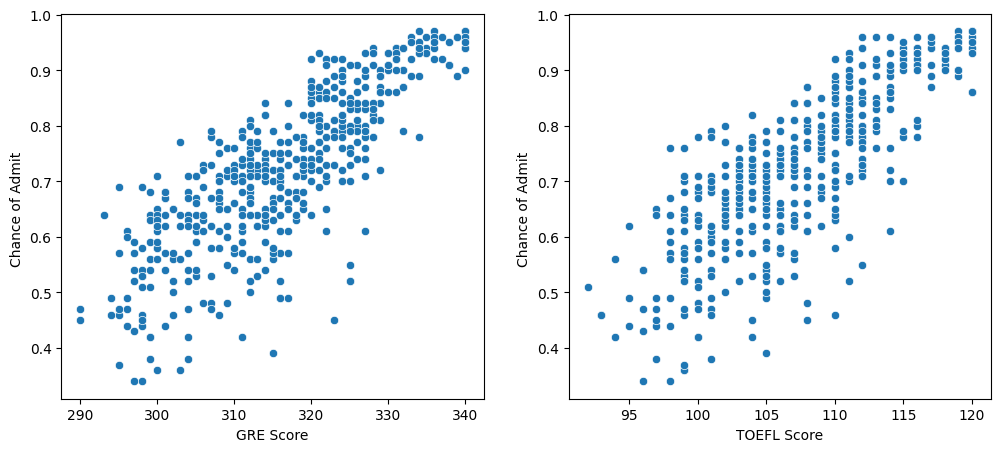

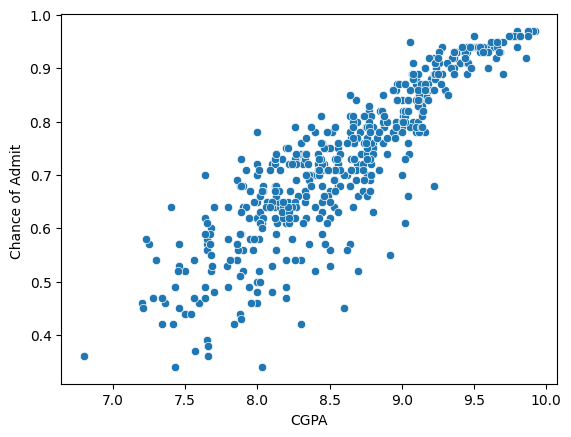

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(data=df, x=num_col[0], y=num_col[3], ax=axs[0])
sns.scatterplot(data=df, x=num_col[1], y=num_col[3], ax=axs[1])
plt.show()
sns.scatterplot(data=df, x=num_col[2], y=num_col[3] )
plt.show()

### INFERENCE:

Seems like there is a **linear correlation** between the continuous variables and the target variable.

<ipython-input-49-b8bbb77a586c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[index], y='Chance of Admit ', data=df, ax=axs[row,col],palette='Set2')
<ipython-input-49-b8bbb77a586c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[index], y='Chance of Admit ', data=df, ax=axs[row,col],palette='Set2')
<ipython-input-49-b8bbb77a586c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col[index], y='Chance of Admit ', data=df, ax=axs[row,col],palette='Set2')
<ipython-input-49-b8bbb77a586c>:6: FutureWarning: 

Passing `

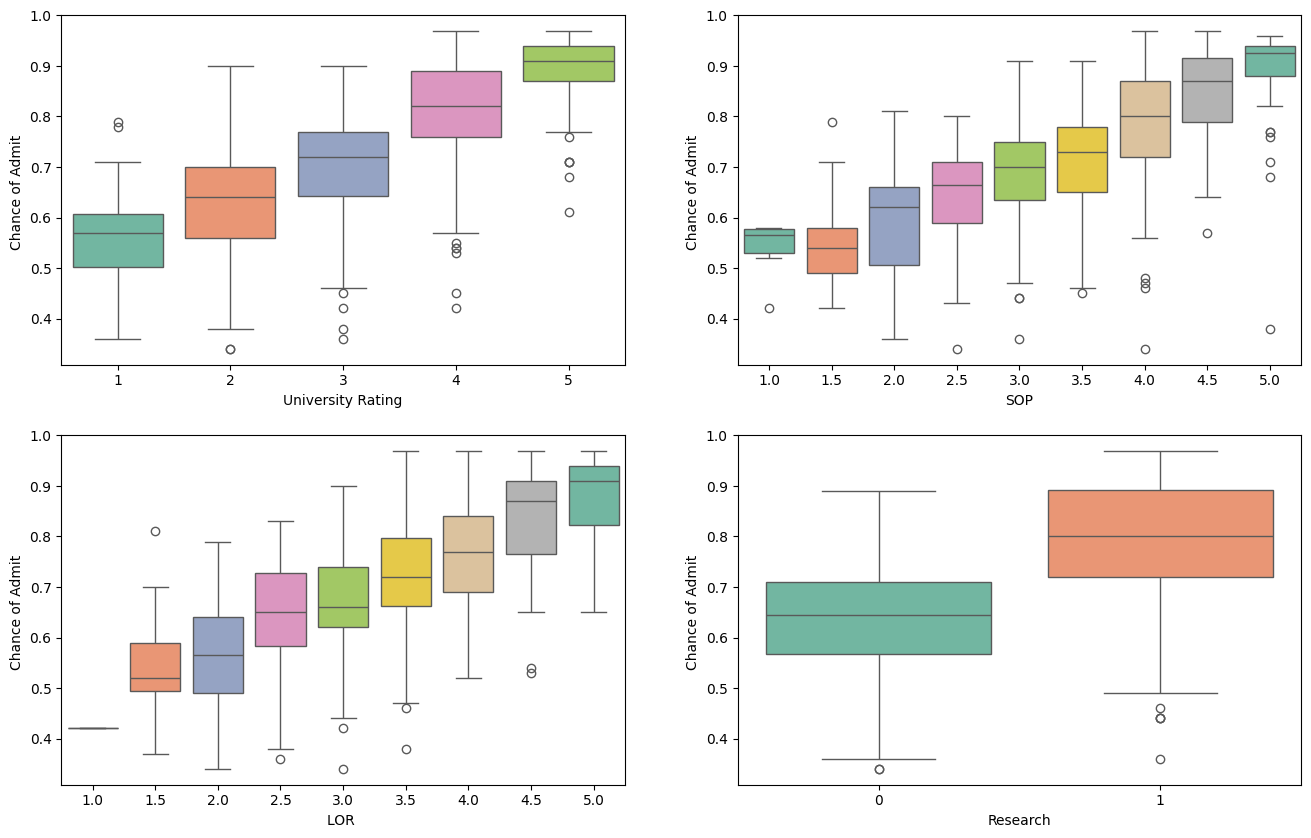

In [ ]:

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(x=cat_col[index], y='Chance of Admit ', data=df, ax=axs[row,col],palette='Set2')
        index += 1

### INFERENCE:

1.Students who have the **research** experience have **more chances of Admit** as compared to other students who don't have the research experience.

2. As SOP/LOR/University rating increases the chance of admit also increases.

But still
there are some outliers

### MULTIVARIATE

In [ ]:
df.corr(numeric_only=False)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

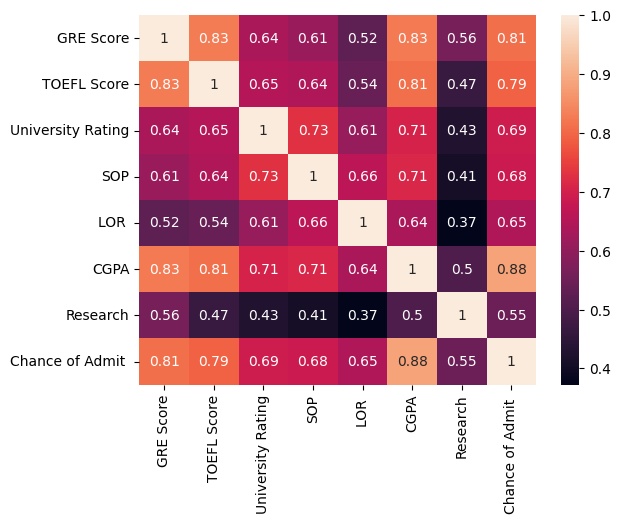

In [ ]:
sns.heatmap(df.corr(numeric_only=False), annot=True)

### INFERENCE:

There is a strong correlation between CGPA and Chance of Admit(0.88)

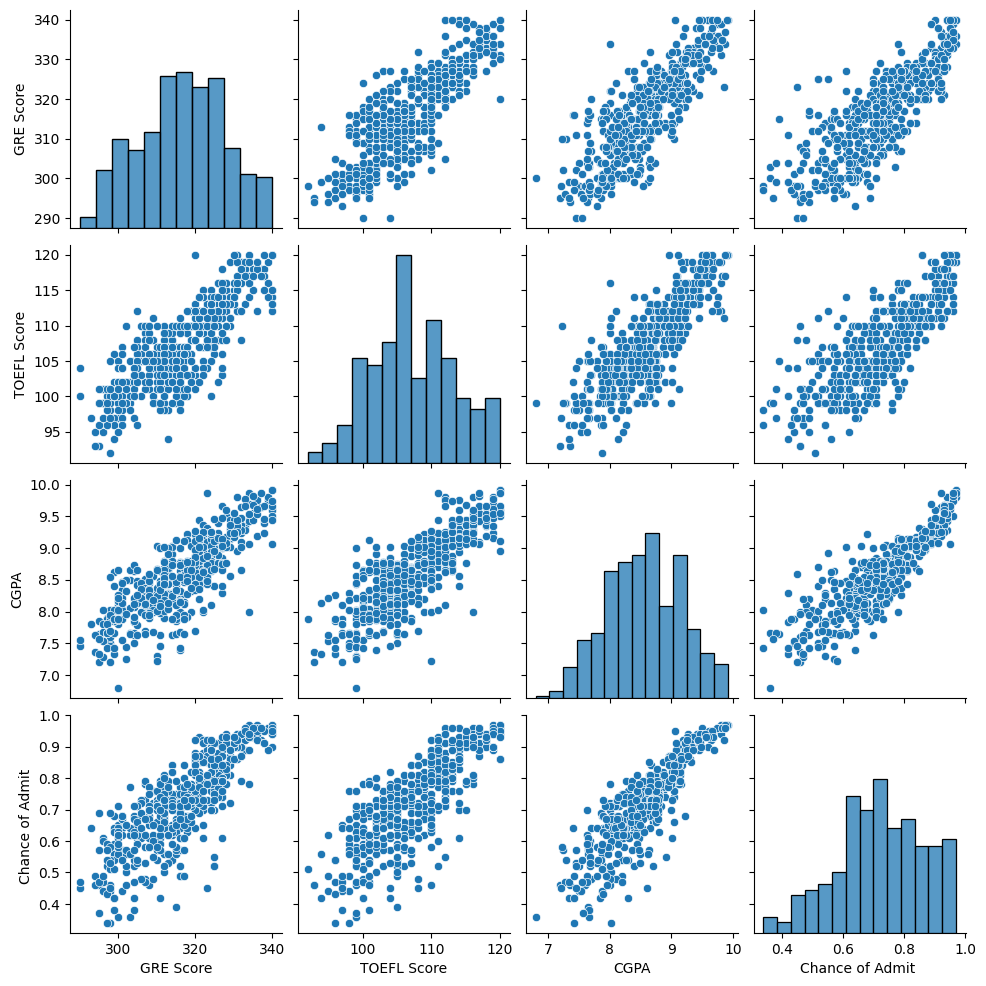

In [ ]:
sns.pairplot(df[num_col])

### INFERENCE:

There is a **positive linear correlation** between all the independent variables and also between these independent variable and chance of admit  

# LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler

## DATA PREPROCESSING FOR MODELING

### TO SPLIT THE DATASET INTO FEATURES AND TARGET VARIABLES


1. The **target** variable is **'Chance of Admit '**

2. All the **other columns** are **Features**

In [ ]:
x = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']      # target

In [ ]:
x.shape

(500, 7)

In [ ]:
y.shape

(500,)

### TO STANDARDIZE THE DATASET

In [ ]:
scaler = StandardScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
scaled_x.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405


### TO SPLIT THE DATA SET INTO TRAIN, VALIDATION AND TEST DATASET

In [ ]:
x_tr_cv,x_test,y_tr_cv,y_test = train_test_split(scaled_x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_tr_cv,y_tr_cv,test_size=0.25,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((300, 7), (300,))

In [ ]:
x_val.shape, y_val.shape

((100, 7), (100,))

In [ ]:
x_test.shape, y_test.shape

((100, 7), (100,))

## MODEL TRAINING

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.02356384, 0.02152842, 0.00166277, 0.00341952, 0.0175225 ,
       0.06475526, 0.01638375])

In [ ]:
model.intercept_

0.720989038244272

### COEFFICIENT & INTERCEPT WITH COLUMN NAMES

In [ ]:
lr_coeff = pd.DataFrame(model.coef_.reshape(1,-1),columns=df.columns[:-1])
lr_coeff['intercept'] = model.intercept_
lr_coeff

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.023564,0.021528,0.001663,0.00342,0.017522,0.064755,0.016384,0.720989


In [ ]:
# to get feature important

imps = np.abs(model.coef_).round(3)
imps

array([0.024, 0.022, 0.002, 0.003, 0.018, 0.065, 0.016])

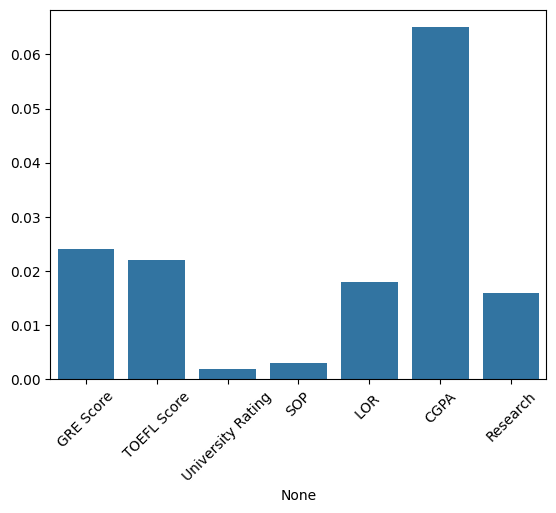

In [ ]:
sns.barplot(x = x_train.columns, y=imps)
plt.xticks(rotation=45)
plt.show()

### INFERENCE:

**CGPA** has **more weightage**/importance than other columns to predict the chance of admit.

### MODEL PERFORMANCE

### R2 score

In [ ]:
perf_tr = model.score(x_train,y_train).round(3)
perf_val = model.score(x_val,y_val).round(3)
print('R2 SCORE OF TRAIN DATA : ',perf_tr)
print('R2 SCORE OF VALIDATION DATA : ',perf_val)


R2 SCORE OF TRAIN DATA :  0.809
R2 SCORE OF VALIDATION DATA :  0.853


### EVALUATION METRICS

### ADJUSTED R2 SCORE

In [ ]:
def adj_r2(x,r2):
  n,d = x.shape
  res = 1-((1-r2)*(n-1)/(n-d-1))
  return res.round(3)

### MSE

In [ ]:
def mse(x,y):
  y_hat = model.predict(x)
  err_mse = np.mean((y-y_hat)**2).round(3)
  return err_mse


### RMSE

In [ ]:
def rmse(x,y):

  err_rmse = np.sqrt(mse(x,y)).round(3)
  return err_rmse

### MAE

In [ ]:
def mae(x,y):
  err_mae = np.abs(y - model.predict(x)).mean().round(3)
  return err_mae


In [ ]:
data = ['TRAIN','VALIDATION']

for i in data:
  if i == 'TRAIN':
    x = x_train
    y = y_train
  else:
    x = x_val
    y = y_val
  r2 = model.score(x,y).round(3)
  print(f'EVALUATION METRICS OF {i} DATA OF LINEAR MODEL')
  print(f'R2 score : {r2}')
  print(f'Adjusted R2 score : {adj_r2(x,r2)}')
  print(f'MSE : {mse(x,y)}')
  print(f'RMSE : {rmse(x,y)}')
  print(f'MAE : {mae(x,y)}')

EVALUATION METRICS OF TRAIN DATA OF LINEAR MODEL
R2 score : 0.809
Adjusted R2 score : 0.804
MSE : 0.004
RMSE : 0.063
MAE : 0.045
EVALUATION METRICS OF VALIDATION DATA OF LINEAR MODEL
R2 score : 0.853
Adjusted R2 score : 0.842
MSE : 0.003
RMSE : 0.055
MAE : 0.039


### INFERENCE:

The model's **performance** on validation data is around **85%** with mse - 0.003, rmse - 0.055, mae - 0.039

### STATSMODEL

In [ ]:
import statsmodels.api as sm

In [ ]:
# Statmodels default is without intercept, to add intercept we need to add constant.

x_sm = sm.add_constant(x_train)

In [ ]:
model_1 = sm.OLS(y_train,x_sm)
result = model_1.fit()

# statstical summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     177.2
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          3.55e-101
Time:                        13:51:33   Log-Likelihood:                 408.76
No. Observations:                 300   AIC:                            -801.5
Df Residuals:                     292   BIC:                            -771.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7210      0.00

### ASSUMPTIONS OF LINEAR REGRESSION:



*   Assumption of linearity
*   No Multi-colinearity
*   Residuals should be normal
*   No Heteroskadesticity
*   No Auto-correlation












### 1. Assumption of Linearity

There must be **linear relationship** between the **independent** variable and the **target**

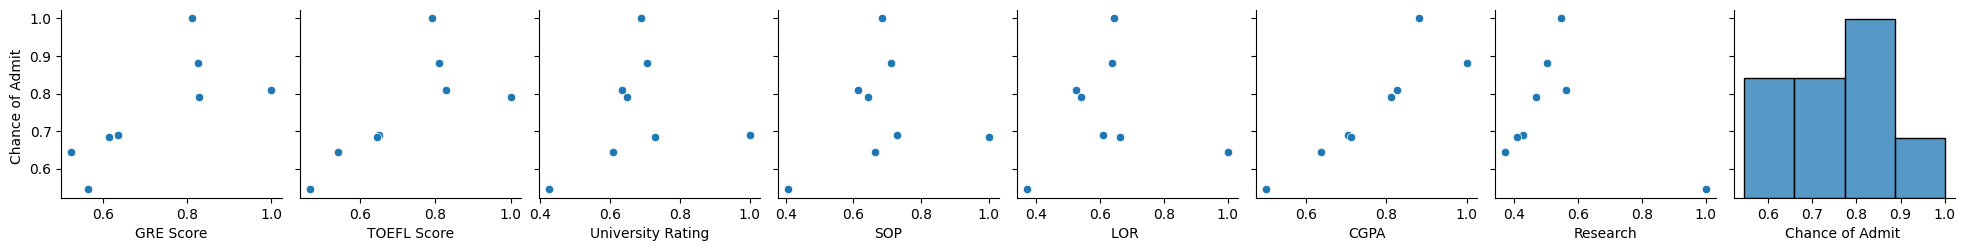

In [ ]:
sns.pairplot(df.corr(numeric_only=False),y_vars=['Chance of Admit '])
plt.show()

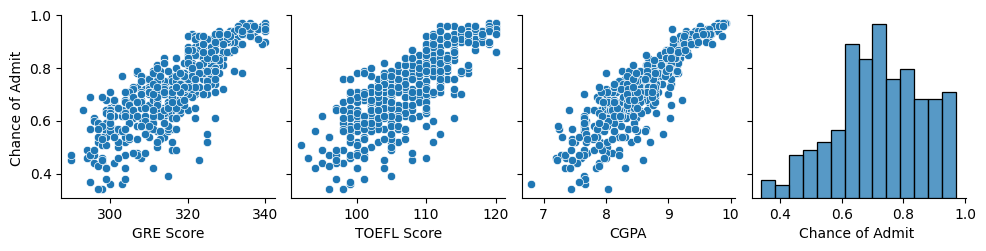

In [ ]:
sns.pairplot(df, y_vars=['Chance of Admit '])
plt.show()

### INFERENCE:

There exists a **positive linear correlation** between features and target

### 2. MULTI-COLINEARITY CHECK

Colinear  - When one feature can be expressed as **linear combination** of other features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
x_t = pd.DataFrame(x_train , columns = x_train.columns)

vif = pd.DataFrame()

vif['features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i)for i in range(x_t.shape[1])]   # i represents each col
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
0,GRE Score,5.14
5,CGPA,4.78
1,TOEFL Score,4.11
2,University Rating,2.65
3,SOP,2.64
4,LOR,1.85
6,Research,1.59


In [ ]:
x_t.drop('GRE Score',axis=1, inplace=True)


vif = pd.DataFrame()

vif['features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values,i)for i in range(x_t.shape[1])]   # i represents each col
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
4,CGPA,4.07
0,TOEFL Score,3.13
2,SOP,2.64
1,University Rating,2.62
3,LOR,1.84
5,Research,1.44


In [ ]:
model.fit(x_t,y_train)
model.score(x_t,y_train)

0.8043016803154724

### INFERENCE:

1. Dropping feature having vif greater than 5 doesnt imporve the performance of the model.

2. VIF of all the features are equal to or less than 5 , so
dataset doesn't seem to have high multicolinearity.

### RESIDUAL ANALYSIS

In [ ]:
from scipy import stats

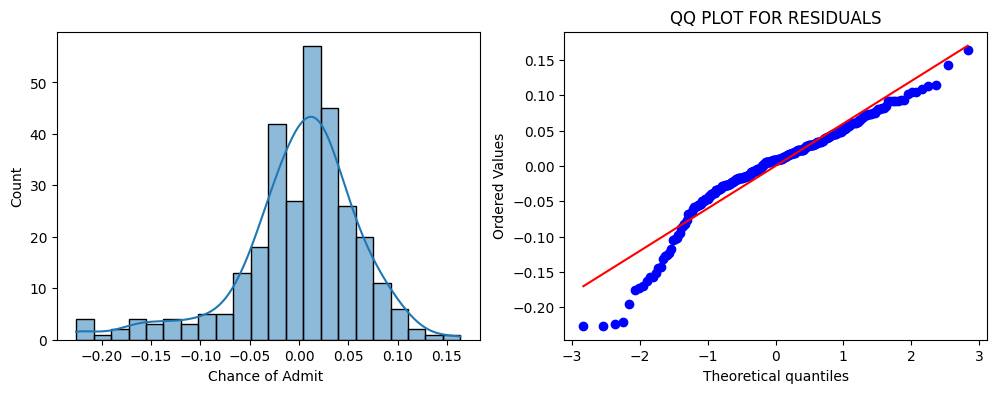

In [ ]:
y_hat = model.predict(x_train)
err = y_train-y_hat

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(err,kde = True)
plt.subplot(1,2,2)
stats.probplot(err, plot=plt)

plt.title('QQ PLOT FOR RESIDUALS')
plt.show()

In [ ]:

res = stats.shapiro(err)
res.statistic

0.9279428124427795

### INFERENCE:

1. QQ plot visually shows that the residuals follow normality

2. Since the statistic value obtained from shapiro test is close to 1 the residuals are normal(closer to 1, more the normality)

### HETEROSKADESTICITY CHECK:

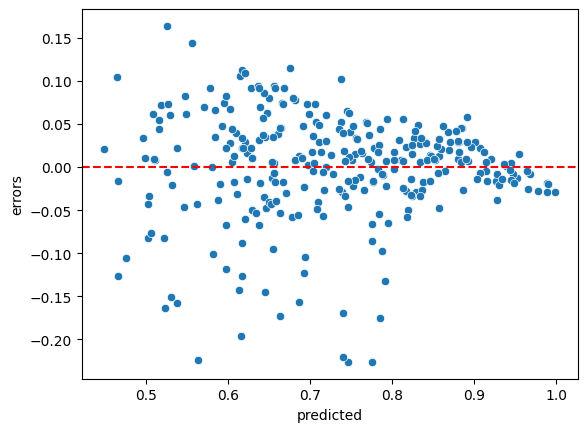

In [ ]:
sns.scatterplot(x = y_hat, y= err)
plt.xlabel("predicted")
plt.ylabel("errors")
plt.axhline(y=0, color='r',linestyle='--')
plt.show()

### INFERENCE:

The figure clearly gives the idea that there is no heteroskadesticity

## MODEL REGULARISATION:

In [ ]:
def adj_r2_1(x,y,r2):
  res = 1-((1-r2)*(len(y)-1))/(len(y)-x.shape[1]-1)
  return res

### LASSO / L1 REGULARISATION

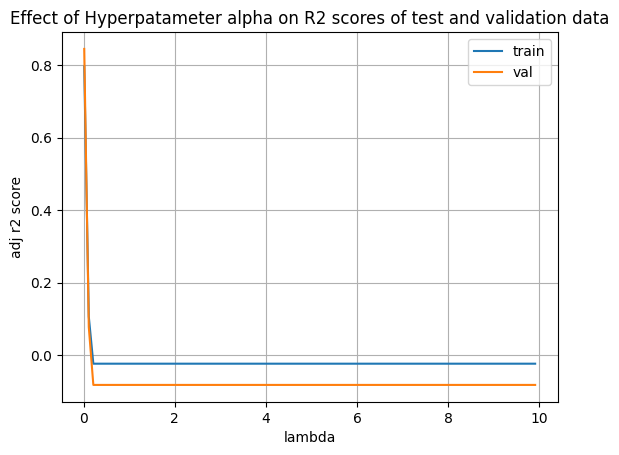

In [ ]:
# Hyperparameter tuning

train_scores = []
val_scores = []

lambda_list = np.arange(0.01,10,0.1)

for rate in lambda_list:
  model_lasso = Lasso(alpha=rate)
  model_lasso.fit(x_train,y_train)

  train_score = adj_r2_1(x_train,y_train,model_lasso.score(x_train,y_train))
  val_score = adj_r2_1(x_val,y_val,model_lasso.score(x_val,y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)


plt.figure()
plt.plot(lambda_list,train_scores,label='train')
plt.plot(lambda_list,val_scores,label='val')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('adj r2 score')
plt.title('Effect of Hyperpatameter alpha on R2 scores of test and validation data')
plt.grid()
plt.show()


In [ ]:
# to find the index of maximum performance

np.argmax(val_scores)

0

In [ ]:
# to find the lambda value at which the performance is maximum

lambda_list[0]

0.01

In [ ]:
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [ ]:
lasso_coeff = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=df.columns[:-1])
lasso_coeff['intercept'] = model_lasso.intercept_
lasso_coeff

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.022689,0.019533,0.0,0.000293,0.012583,0.066168,0.01085,0.721333


In [ ]:
data = ['TRAIN','VALIDATION']

for i in data:
  if i == 'TRAIN':
    x = x_train
    y = y_train
  else:
    x = x_val
    y = y_val
  r2 = model_lasso.score(x,y).round(3)
  print(f'EVALUATION METRICS OF {i} DATA OF LASSO MODEL')
  print(f'R2 score : {r2}')
  print(f'Adjusted R2 score : {adj_r2(x,r2)}')
  print(f'MSE : {mse(x,y)}')
  print(f'RMSE : {rmse(x,y)}')
  print(f'MAE : {mae(x,y)}')

EVALUATION METRICS OF TRAIN DATA OF LASSO MODEL
R2 score : -0.0
Adjusted R2 score : -0.024
MSE : 0.004
RMSE : 0.063
MAE : 0.045
EVALUATION METRICS OF VALIDATION DATA OF LASSO MODEL
R2 score : -0.006
Adjusted R2 score : -0.083
MSE : 0.003
RMSE : 0.055
MAE : 0.039


### RIDGE / L2 REGULARISATION


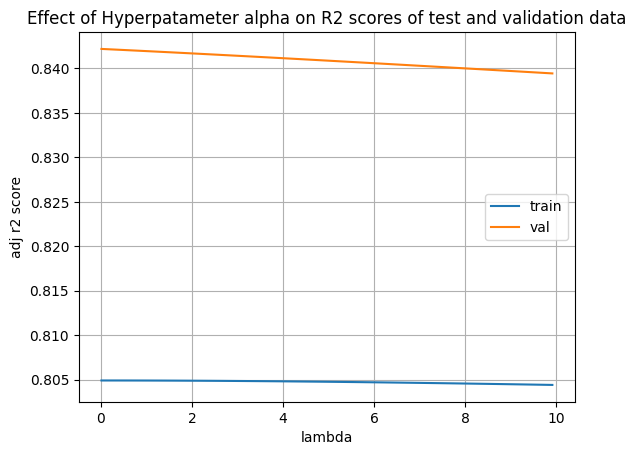

In [ ]:
# Hyperparameter tuning

train_scores = []
val_scores = []

lambda_list = np.arange(0.01,10,0.1)

for rate in lambda_list:
  model_ridge = Ridge(alpha=rate)
  model_ridge.fit(x_train,y_train)

  train_score = adj_r2_1(x_train,y_train,model_ridge.score(x_train,y_train))
  val_score = adj_r2_1(x_val,y_val,model_ridge.score(x_val,y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)


plt.figure()
plt.plot(lambda_list,train_scores,label='train')
plt.plot(lambda_list,val_scores,label='val')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('adj r2 score')
plt.title('Effect of Hyperpatameter alpha on R2 scores of test and validation data')
plt.grid()
plt.show()


In [ ]:
# to find the index of maximum performance

np.argmax(val_scores)

0

In [ ]:
# to find the lambda value at which the performance is maximum

lambda_list[0]

0.01

In [ ]:
model_ridge = Ridge(alpha=0.01)
model_ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [ ]:
ridge_coeff = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=df.columns[:-1])
ridge_coeff['intercept'] = model_ridge.intercept_
ridge_coeff

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.023566,0.02153,0.001664,0.003421,0.017523,0.064748,0.016384,0.720989


In [ ]:
data = ['TRAIN','VALIDATION']

for i in data:
  if i == 'TRAIN':
    x = x_train
    y = y_train
  else:
    x = x_val
    y = y_val
  r2 = model_ridge.score(x,y).round(3)
  print(f'EVALUATION METRICS OF {i} DATA OF RIDGE MODEL')
  print(f'R2 score : {r2}')
  print(f'Adjusted R2 score : {adj_r2(x,r2)}')
  print(f'MSE : {mse(x,y)}')
  print(f'RMSE : {rmse(x,y)}')
  print(f'MAE : {mae(x,y)}')

EVALUATION METRICS OF TRAIN DATA OF RIDGE MODEL
R2 score : 0.809
Adjusted R2 score : 0.804
MSE : 0.004
RMSE : 0.063
MAE : 0.045
EVALUATION METRICS OF VALIDATION DATA OF RIDGE MODEL
R2 score : 0.853
Adjusted R2 score : 0.842
MSE : 0.003
RMSE : 0.055
MAE : 0.039


### ELASTICNET REGULARISATION

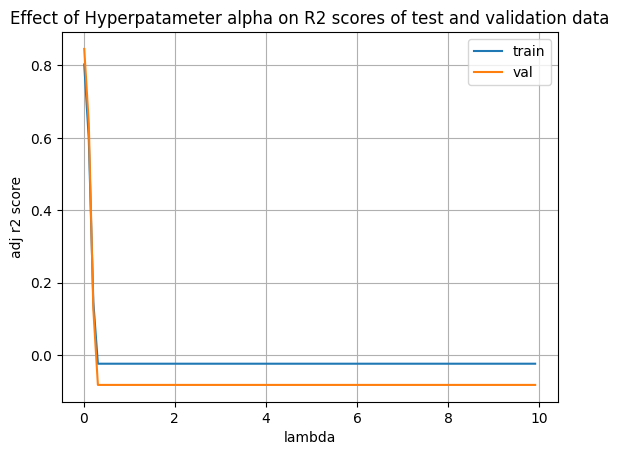

In [ ]:
# Hyperparameter tuning

train_scores = []
val_scores = []

lambda_list = np.arange(0.01,10,0.1)

for rate in lambda_list:
  model_elasticnet = ElasticNet(alpha=rate)
  model_elasticnet.fit(x_train,y_train)

  train_score = adj_r2_1(x_train,y_train,model_elasticnet.score(x_train,y_train))
  val_score = adj_r2_1(x_val,y_val,model_elasticnet.score(x_val,y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)


plt.figure()
plt.plot(lambda_list,train_scores,label='train')
plt.plot(lambda_list,val_scores,label='val')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('adj r2 score')
plt.title('Effect of Hyperpatameter alpha on R2 scores of test and validation data')
plt.grid()
plt.show()


In [ ]:
# to find the index of maximum performance

np.argmax(val_scores)

0

In [ ]:
# to find the lambda value at which the performance is maximum

lambda_list[0]

0.01

In [ ]:
model_elasticnet = ElasticNet(alpha = 0.01)
model_elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.01)

In [ ]:
elasticnet_coeff = pd.DataFrame(model_elasticnet.coef_.reshape(1,-1),columns=df.columns[:-1])
elasticnet_coeff['intercept'] = model_elasticnet.intercept_
elasticnet_coeff

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.023429,0.020733,0.00097,0.00216,0.015145,0.06431,0.013656,0.721164


In [ ]:
data = ['TRAIN','VALIDATION']

for i in data:
  if i == 'TRAIN':
    x = x_train
    y = y_train
  else:
    x = x_val
    y = y_val
  r2 = model_elasticnet.score(x,y).round(3)
  print(f'EVALUATION METRICS OF {i} DATA OF ELASTICNET MODEL')
  print(f'R2 score : {r2}')
  print(f'Adjusted R2 score : {adj_r2(x,r2)}')
  print(f'MSE : {mse(x,y)}')
  print(f'RMSE : {rmse(x,y)}')
  print(f'MAE : {mae(x,y)}')

EVALUATION METRICS OF TRAIN DATA OF ELASTICNET MODEL
R2 score : 0.807
Adjusted R2 score : 0.802
MSE : 0.004
RMSE : 0.063
MAE : 0.045
EVALUATION METRICS OF VALIDATION DATA OF ELASTICNET MODEL
R2 score : 0.856
Adjusted R2 score : 0.845
MSE : 0.003
RMSE : 0.055
MAE : 0.039


## IDENTIFYING BEST MODEL

In [ ]:
combined = pd.DataFrame(lr_coeff.append(lasso_coeff).append(ridge_coeff).append(elasticnet_coeff))
combined.index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]

combined

<ipython-input-120-da26f979baff>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = pd.DataFrame(lr_coeff.append(lasso_coeff).append(ridge_coeff).append(elasticnet_coeff))
<ipython-input-120-da26f979baff>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = pd.DataFrame(lr_coeff.append(lasso_coeff).append(ridge_coeff).append(elasticnet_coeff))


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
Linear Regression Model,0.023564,0.021528,0.001663,0.003420,0.017522,0.064755,0.016384,0.720989
Lasso Regression Model,0.022689,0.019533,0.000000,0.000293,0.012583,0.066168,0.010850,0.721333
Ridge Regression Model,0.023566,0.021530,0.001664,0.003421,0.017523,0.064748,0.016384,0.720989
ElasticNet Regression Model,0.023429,0.020733,0.000970,0.002160,0.015145,0.064310,0.013656,0.721164


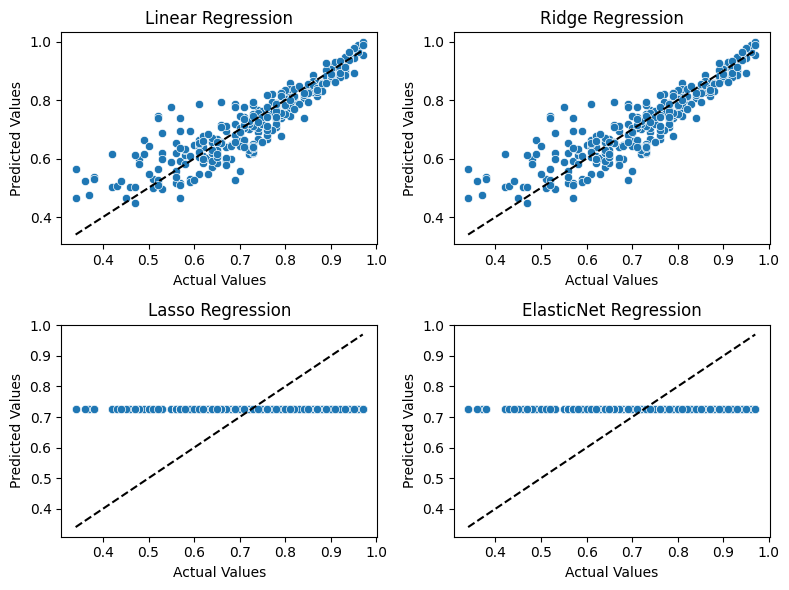

In [ ]:

# Actual v/s Predicted values for training data

actual_values = y_train.values
predicted_values = [model.predict(x_train),model_ridge.predict(x_train), model_lasso.predict(x_train),model_elasticnet.predict(x_train)]
type = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']

plt.figure(figsize=(8,6))
i=1
for preds in predicted_values:
  ax = plt.subplot(2,2,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(type[i-1])
  i+=1

plt.tight_layout()
plt.show()

In [ ]:
model_r2 = model.score(x_val,y_val)
model_lasso_r2 = model_lasso.score(x_val,y_val)
model_ridge_r2 = model_ridge.score(x_val,y_val)
model_elasticnet_r2 = model_elasticnet.score(x_val,y_val)
lr_adj_r2 = adj_r2(x_val,model.score(x_val,y_val))
lasso_adj_r2 = adj_r2(x_val,model_lasso.score(x_val,y_val))
ridge_adj_r2 = adj_r2(x_val,model_ridge.score(x_val,y_val))
elasticnet_adj_r2 = adj_r2(x_val,model_elasticnet.score(x_val,y_val))


In [ ]:
overall_r2 = pd.DataFrame([model_r2,model_lasso_r2,model_ridge_r2,model_elasticnet_r2])

overall_r2.index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]


overall_r2.rename(columns = { 0:'PERFORMANCE'}, inplace=True)

overall_r2['Adjusted R2']=[lr_adj_r2,lasso_adj_r2,ridge_adj_r2,elasticnet_adj_r2]

overall_r2

,PERFORMANCE,Adjusted R2
Linear Regression Model,0.853360,0.842
Lasso Regression Model,-0.006014,-0.083
Ridge Regression Model,0.853358,0.842
ElasticNet Regression Model,-0.006014,-0.083


### INFERENCE:

1. The graph visually proves that **Linear Regression model** and **Ridge model** are the best

2. The above tables states the fact that Linear Regression model and Ridge model are the best statistically


## REPORTING PERFORMANCE OF LINEAR MODEL(BEST MODEL) ON TEST DATA

In [ ]:
x_test.shape

(100, 7)

In [ ]:
y_test.shape

(100,)

In [ ]:
r2 = model.score(x_test, y_test)

In [ ]:
print(f'R2 score : {r2}')
print(f'Adjusted R2 score : {adj_r2(x_test,r2)}')
print(f'MSE : {mse(x_test,y_test)}')
print(f'RMSE : {rmse(x_test,y_test)}')
print(f'MAE : {mae(x_test,y_test)}')

R2 score : 0.81889261042778
Adjusted R2 score : 0.805
MSE : 0.004
RMSE : 0.063
MAE : 0.043


### PERFORMANCE OF THE MODEL:

The performance of the Linear model on the test data is **81%**

## INSIGHTS:

1. Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

2. Target/Dependent Variable : Chance of Admit (the value we want to predict)

3. **CGPA** is the **most important feature** of all.

4. From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission

5. the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.

6. From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant

7. Both Linear Regression and Ridge Regression models, which are our best models, have captured upto **82%** of the variance in the target variable (chance of admit).

8. All the assumptions of Linear Regression have been met.

9. Graduates having research experience has higher chances of Admission , but also we can observe some outliers within that caregory.

10. Clearly, **Lasso** and **Elasticnet** models are **Underfit**. Thus **Linear** and **Ridge** model are the **best**




## RECOMMENDATIONS:

1. Since GRE & TOFEL scores have almost same weightage, it is recommended to add more independent features for better prediction.

2. Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables

3. Importance of Research experience has to be highlighted among the graduates

4. The Institution has to focus on mentoring Graduates to write SOP which would increase their chance of Admit

5. Importance of CGPA has to be emphasized as its weightage plays a major role to predict the chance of admit.
